
---
# **------Lab Report 04-----**
## **Name   : Muhammad Ehtisham Saleem**
## **Reg No : B22F1242AI108**
## **Lab : Artificial Neural Network**
## **Submitted To : Mam Ammara Irfan**
## **Course Instructor : Dr Arshad Iqbal**
---

---



# **Implementing an Artificial Neural Network (ANN) for Multi-Class Classification**

## **Introduction:**
>In this lab task, we will implement an Artificial Neural Network (ANN) for a multi-class classification problem. The process will include multiple steps, from preprocessing the data to building and training the model, and finally evaluating its performance. The main objectives are to understand and apply the concepts of forward and backpropagation, activation functions, optimizers, and regularization techniques. This approach will help us achieve a robust model that classifies the data into different categories.



## **1. Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## **Explanation:**
* Numpy & Pandas: Used for data manipulation, loading, and preprocessing.
* Matplotlib & Seaborn: Used for visualizations, such as plotting graphs and data distributions.
* Scikit-learn: For data splitting, scaling, and encoding.
* TensorFlow/Keras: For building the ANN model and using layers, optimizers, and metrics.
* Metrics (accuracy, confusion matrix, classification report): For model evaluation.

## **2. Load Dataset**

In [ ]:
df = pd.read_csv("Student_performance_data.csv")
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None
         StudentID 

## **Explanation:**
* Data Loading: We load the dataset into a Pandas DataFrame using read_csv().
* Data Inspection: Using info() and describe() methods to get an overview of the dataset, checking the number of features, missing values, and statistical summary.
* Understand Data: Helps to understand the dataset's structure before proceeding with preprocessing and modeling.

## **3. Preprocess Data**
In this step, we clean the data, encode the target labels, and scale the features for model efficiency.

### **3.1 Encode Target Labels**

In [ ]:
label_encoder = LabelEncoder()
df['GradeClass'] = label_encoder.fit_transform(df['GradeClass'])


### **Explanation:**
* Label Encoding: The target variable ‘GradeClass’ is categorical, so we need to convert it into numeric values using LabelEncoder.
* Integer Labels: This transforms each class into a unique integer label, making it suitable for multi-class classification.
* Compatibility: This is necessary for training machine learning models that require numeric data.

### **3.2 Split Features and Target**

In [ ]:
X = StandardScaler().fit_transform(df.drop(columns=['StudentID','GradeClass']))
y = df['GradeClass']


### **Explanation:**
* Feature Selection: We drop unnecessary columns such as StudentID and GradeClass, as these are not relevant for training the model.
* Standardization: We apply StandardScaler to normalize the feature values, ensuring they are on the same scale, improving model convergence.
* Target Variable: The GradeClass column is kept as the target variable, which will be predicted by the model.

### **3.3 Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


### **Explanation:**
* Stratified Split: We split the data into training and testing sets, using 80% for training and 20% for testing. The stratify=y ensures that the class distribution is preserved in both sets.
* Random State: The random_state=42 ensures reproducibility by fixing the random seed for the split.
* Training and Testing: This separation is essential to evaluate the model on unseen data and prevent overfitting.

### **3.4 Data Visualization**

<ipython-input-6-9e89248e6d75>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GradeClass', data=df, palette='Set2')  # You can change 'Set2' to any color palette you prefer


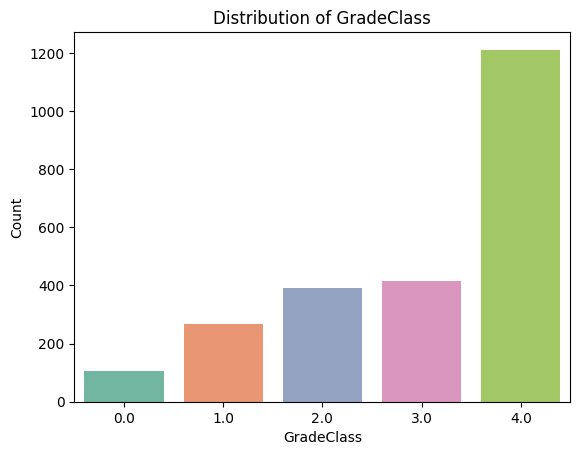

In [ ]:
sns.countplot(x='GradeClass', data=df, palette='Set2')
plt.title('Distribution of GradeClass')
plt.xlabel('GradeClass')
plt.ylabel('Count')
plt.show()

### **Explanation:**
* Class Distribution: We visualize the distribution of the target variable to understand the class balance.
* Identify Bias: Helps us identify any class imbalance, which may affect model performance.
* Adjust Strategy: If the classes are imbalanced, we might consider techniques like oversampling or undersampling.

## **4. Build the ANN Model**

In [ ]:
model = Sequential([
    Dense(128, activation='relu', kernel_initializer='he_uniform', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Explanation:**
* Sequential Model: We use a Sequential model, which allows stacking layers in a linear fashion.
* Dense Layers: The model has two hidden layers with 128 and 64 units respectively, using ReLU activation, a popular activation function for hidden layers.
* Output Layer: The output layer has softmax activation, which is suitable for multi-class classification since it outputs a probability distribution over the classes.

## **5. Compile the Model**

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## **Explanation:**
* Optimizer: We use Adam optimizer, which adapts the learning rate and helps the model converge faster.
* Loss Function: Sparse categorical crossentropy is used because the target is categorical with more than two classes.
* Metrics: We track accuracy during training and testing to monitor performance.

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16
)


Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3419 - loss: 1.8515 - val_accuracy: 0.6200 - val_loss: 1.0504
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6076 - loss: 1.1019 - val_accuracy: 0.6827 - val_loss: 0.8891
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6087 - loss: 1.0595 - val_accuracy: 0.7223 - val_loss: 0.8090
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6384 - loss: 0.9494 - val_accuracy: 0.7578 - val_loss: 0.7632
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6192 - loss: 0.9802 - val_accuracy: 0.7704 - val_loss: 0.7483
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6453 - loss: 0.9243 - val_accuracy: 0.7829 - val_loss: 0.7404
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7033 - loss: 0.8257 - val_accuracy: 0.7891 - val_loss: 0.7362
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6875 - loss: 0.8402 - val_accuracy: 0.

## **Explanation:**
* Training: The model is trained using the training data and evaluated on the validation data during training to monitor overfitting.
* Epochs: The model is trained for 50 epochs, which refers to the number of times the entire dataset will pass through the network.
* Batch Size: A batch size of 16 is chosen, meaning 16 samples are processed before updating the weights.

## **8. Evaluate Model Performance**

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Test Accuracy: 82.25%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.45      0.24      0.31        21
         1.0       0.73      0.69      0.70        54
         2.0       0.74      0.81      0.77        78
         3.0       0.74      0.66      0.70        83
         4.0       0.91      0.96      0.93       243

    accuracy                           0.82       479
   macro avg       0.71      0.67      0.69       479
weighted avg       0.81      0.82      0.81       479



## **9. Plotting Loss and Accuracy Curves**

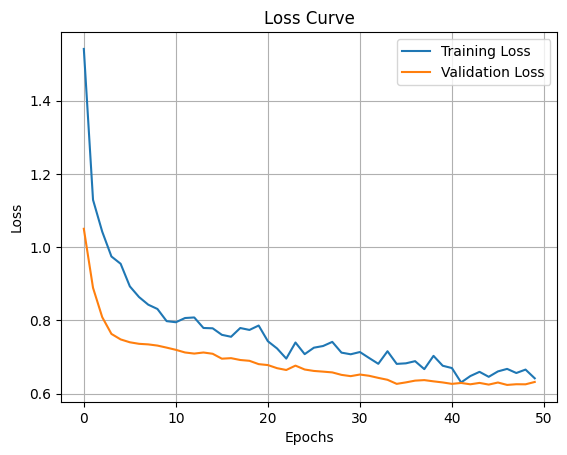

In [ ]:
# Plot Loss Curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()




## **Plot Accuracy Curve**

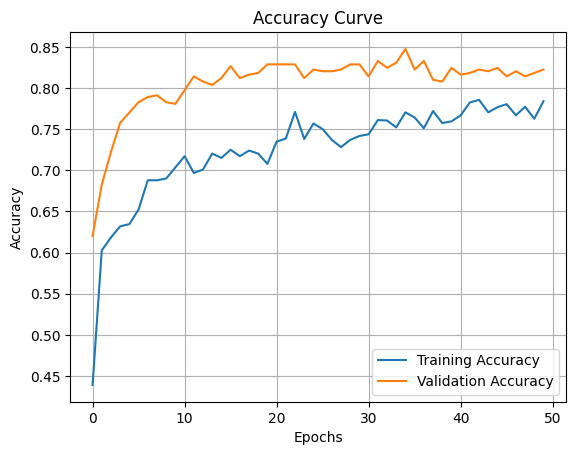

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## **Train and Test Accuracy**

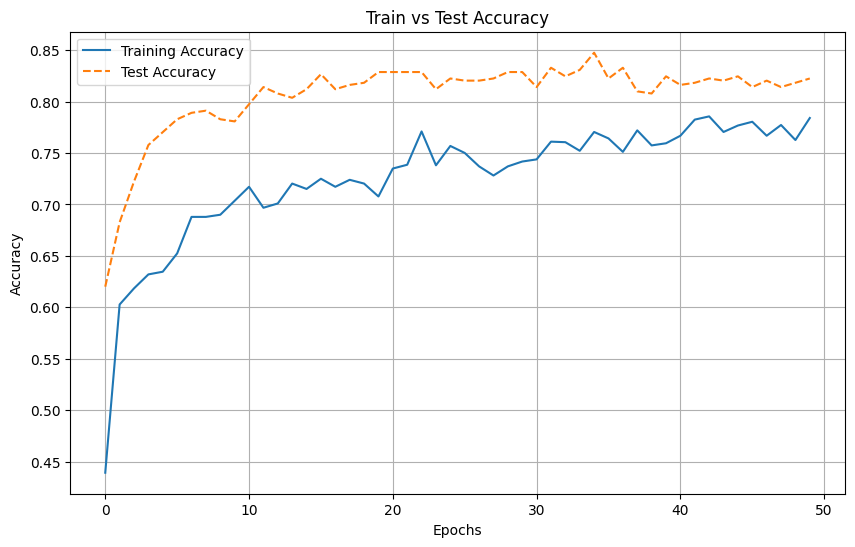

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', linestyle='--')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## **Explanation:**
* Loss Curve: Visualizes the training loss and validation loss over epochs to ensure the model is converging.
* Accuracy Curve: Shows the change in training and validation accuracy, helping us to analyze how well the model generalizes.
* Analyze Convergence: These curves provide insight into whether the model is overfitting or underfitting.
* The plot will display two curves: one for the training accuracy and one for the test accuracy, allowing you to visually compare how they evolve during training.

## **Conclusion**
>In this task, we successfully implemented an ANN model for multi-class classification. We preprocessed the data, built the model using forward and backpropagation, applied dropout regularization and batch normalization, and evaluated its performance. The accuracy score, loss curves, and confusion matrix were used to analyze and improve the model's performance. This model serves as a foundational approach to classification problems using deep learning techniques.



---

